In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

pd.set_option('display.max_columns', None)

df = pd.read_csv('memphis_reviews_updated.csv')
df = df[['categories', 'mean_rating', 'url', 'name_business']]

# only keep one row for every company
df = df.groupby(['url'], sort=False).first().reset_index()

# clean the column names a bit
df['categories'] = df['categories'].str.replace(' ', '')
df['categories'] = df['categories'].str.replace("'", '')
df['categories'] = df['categories'].str.replace('[', '')
df['categories'] = df['categories'].str.replace(']', '')

# make all categories boolean columns
df = df.join(df['categories'].str.get_dummies(','))
df = df.drop(columns=['categories', 'name_business', 'url'])
# get the count per column
df.loc['total'] = df.sum()

# extract the top 10 categories
df = df.T
top_10 = list(df.nlargest(10, 'total').index.values)

# extract the bottom 10 categories
bottom_10 = list(df.nsmallest(10, 'total').index.values)

# get the average rating per category
df = df.T
df = df[:-1]
cols = df.columns

averages = []

for i in cols:
    df_cut = df.loc[df[i] == 1]
    averages.append(df_cut['mean_rating'].mean())

average_per_category_df = pd.DataFrame(
    {'mean_rating': averages,
     'category': cols}
)
average_per_category_df = average_per_category_df[1:]

bottom_10 = average_per_category_df.sort_values('mean_rating')[0:10]
top_10 = average_per_category_df.sort_values('mean_rating', ascending=False)[0:10]

bottom_10_cat = list(bottom_10['category'])
top_10_cat = list(top_10['category'])

In [3]:
df = pd.read_csv('memphis_reviews_updated.csv')
df = df[['categories', 'mean_rating', 'url', 'name_business']]

# only keep one row for every company
df = df.groupby(['url'], sort=False).first().reset_index()

# clean the column names a bit
df['categories'] = df['categories'].str.replace(' ', '')
df['categories'] = df['categories'].str.replace("'", '')
df['categories'] = df['categories'].str.replace('[', '')
df['categories'] = df['categories'].str.replace(']', '')

# make all categories boolean columns
df = df.join(df['categories'].str.get_dummies(','))
df = df.drop(columns=['categories', 'name_business', 'url'])
# get the count per column
df.loc['total'] = df.sum()

df = df.T[1:]
df.index.name = 'category'
count_top_10 = df.loc[top_10_cat]['total'].reset_index()
count_bottom_10 = df.loc[bottom_10_cat]['total'].reset_index()

df_top_10 = pd.merge(top_10, count_top_10, on='category')
df_bottom_10 = pd.merge(bottom_10, count_bottom_10, on='category')
df_top_10

,mean_rating,category,total
0,5.00,Grocery,1.0
1,4.75,African,2.0
2,4.75,Venezuelan,2.0
3,4.50,SoulFood,4.0
4,4.50,Hawaiian,1.0
5,4.50,Colombian,1.0
6,4.50,Kebab,1.0
7,4.50,ChickenWings,2.0
8,4.50,Cantonese,1.0
9,4.50,Ethiopian,1.0


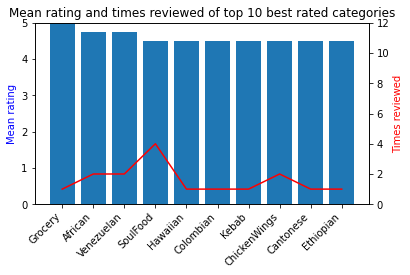

In [12]:
import matplotlib.pyplot as plt
#creating the plot
df = df_top_10
fig, ax = plt.subplots()
ax2 = ax.twinx()
ax.bar(df.index, df['mean_rating'], label='Mean rating')
ax2.plot(df.index, df['total'], label='Count', color='red')
ax.set_xticks(np.arange(len(df['category'])))
ax.set_xticklabels(df['category'], rotation = 45, ha="right")
ax.set_ylabel('Mean rating', color='blue')
ax2.set_ylabel('Times reviewed', color='red')
#set the y axes
ax.set_ylim([0, 5])
ax2.set_ylim([0, 12])

plt.title('Mean rating and times reviewed of top 10 best rated categories')
plt.gcf().subplots_adjust(bottom=0.25)
# plt.savefig('top_10')

In [ ]:
#creating the plot for bottom 10
df = df_bottom_10
fig, ax = plt.subplots()
ax2 = ax.twinx()
ax.bar(df.index, df['mean_rating'], label='Mean rating')
ax2.plot(df.index, df['total'], label='Count', color='red')
ax.set_xticks(np.arange(len(df['category'])))
ax.set_xticklabels(df['category'], rotation = 45, ha="right")
#name the columns
ax.set_ylabel('Mean rating', color='blue')
ax2.set_ylabel('Times reviewed', color='red')

#set the y axes
ax.set_ylim([0, 5])
ax2.set_ylim([0, 12])

plt.title('Mean rating and times reviewed of top 10 worst rated categories')

#gotta add this cuz otherwise the names at the bottom are cut off
plt.gcf().subplots_adjust(bottom=0.40)

# plt.savefig('bottom_10')

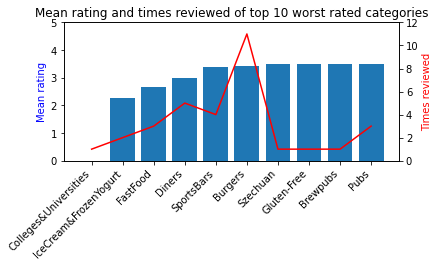